First five rows of data:
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


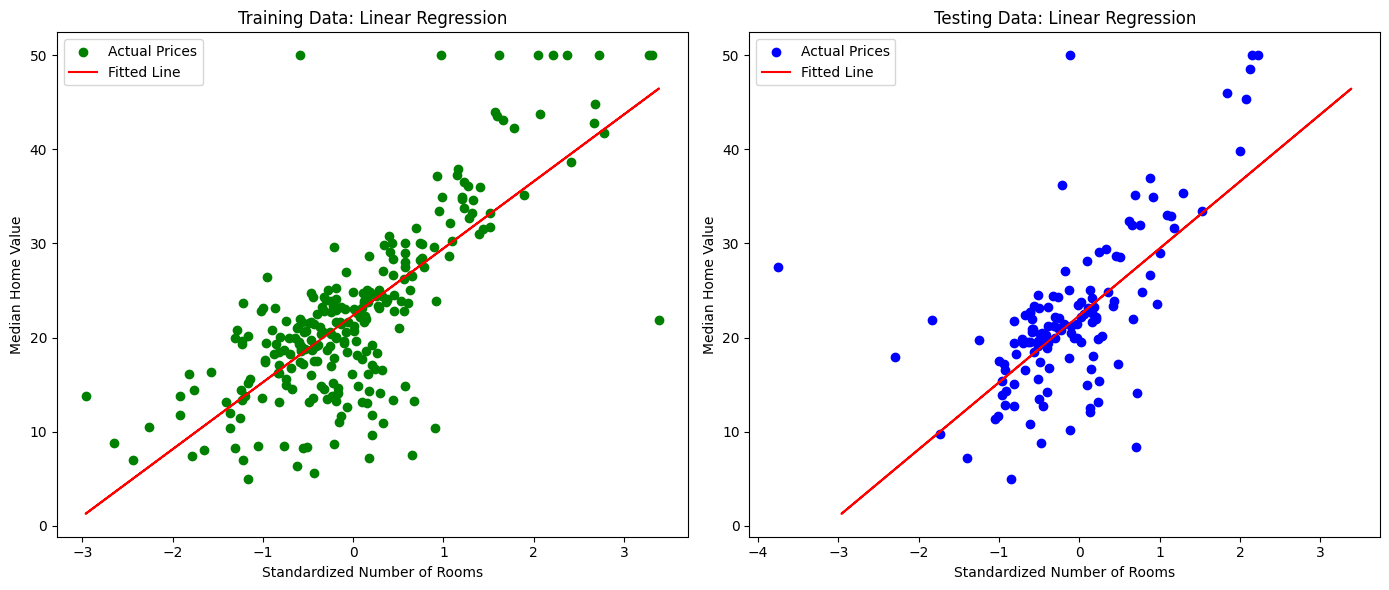

Coefficients: [7.1176022]
Intercept: 22.359923664122146
Mean Squared Error (Test): 43.15136159813931
Coefficient of Determination (R^2 Score): 0.4070689503353344


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the Boston Housing dataset
housing_data = pd.read_csv('/content/HousingData.csv')
print("First five rows of data:\n", housing_data.head())

# Handle missing values if any (replace '?' with NaN and drop rows with NaN values)
housing_data.replace('?', np.nan, inplace=True)
housing_data.dropna(inplace=True)

# Convert data types if necessary (assuming no conversion needed for this dataset)

# Select features and target variable
# For this example, let's use 'RM' (average number of rooms) as a feature to predict 'MEDV' (median home value)
X = housing_data[['RM']].values  # Feature: Number of Rooms
y = housing_data['MEDV'].values  # Target: Median Home Value

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

# Predict
y_pred_train = regressor.predict(X_train_scaled)
y_pred_test = regressor.predict(X_test_scaled)

# Plotting
plt.figure(figsize=(14, 6))

# Plot for Training Data
plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled, y_train, color="green", label="Actual Prices")
plt.plot(X_train_scaled, y_pred_train, color="red", label="Fitted Line")
plt.title("Training Data: Linear Regression")
plt.xlabel("Standardized Number of Rooms")
plt.ylabel("Median Home Value")
plt.legend()

# Plot for Testing Data
plt.subplot(1, 2, 2)
plt.scatter(X_test_scaled, y_test, color="blue", label="Actual Prices")
plt.plot(X_train_scaled, y_pred_train, color="red", label="Fitted Line")
plt.title("Testing Data: Linear Regression")
plt.xlabel("Standardized Number of Rooms")
plt.ylabel("Median Home Value")
plt.legend()

plt.tight_layout()
plt.show()

# Print the coefficients and evaluation metrics
print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)

print('Mean Squared Error (Test):', mean_squared_error(y_test, y_pred_test))
print('Coefficient of Determination (R^2 Score):', r2_score(y_test, y_pred_test))
